In [1]:
using Pkg
using Knet

In [2]:
using Base.Iterators

In [3]:
#NOTE

#True dataset : 4183
#All dataset : 9763

In [4]:
# using NBInclude
# @nbinclude("Bimodal_Embedding.ipynb")
include("Bimodal_Embedding.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.ju

trans_nll (generic function with 1 method)

In [5]:
#=

dataset_instructions = []

open("instructions_unique.txt") do file
    for f in eachline(file)
    push!(dataset_instructions,f)    
    end
end
# if (gpu()>=0)
#     dataset_instructions = KnetArray(dataset_instructions)
# end
summary(dataset_instructions[1])
=#

In [6]:
Pkg.add("VideoIO"); using VideoIO

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [7]:
Pkg.add("Images"); using Images; Pkg.add("Colors"); using Colors

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [9]:
function GetPreProcessedImageArrayDataset(img, cropfromleft::Float64, cropfromright::Float64, cropfromtop::Float64, cropfrombottom::Float64, target_height::Int, target_width::Int)
    channels, height, width = size(img)
    img = img[:,Int(round(height*cropfromtop))+1:Int(round((1-cropfrombottom)*height)), Int(round(width*cropfromleft))+1:Int(round((1-cropfromright)*width))]
    img = imresize(img, (channels, target_height, target_width))
    permutedims(img, (2,3,1))
end

GetPreProcessedImageArrayDataset (generic function with 1 method)

In [8]:
#=

io = VideoIO.open("montezuma2.mp4")
f = VideoIO.openvideo(io)
target_width = 160
target_height = 210
crop_from_top = 0.1
crop_from_bottom = 0.12
crop_from_left = 0.15
crop_from_right = 0.15
img = read(f)
img = GetPreProcessedImageArrayDataset(channelview(img), crop_from_left, crop_from_right, crop_from_top, crop_from_bottom, target_height, target_width)
# img = reinterpret.(UInt8,img)
frame_pairs = []
println(summary(img))
current_frame = img

while !eof(f)
    global current_frame
    prev_frame = current_frame
    current_frame = read(f)
    current_frame = GetPreProcessedImageArrayDataset(channelview(current_frame), crop_from_left, crop_from_right, crop_from_top, crop_from_bottom,target_height, target_width)
#     current_frame = reinterpret.(UInt8,current_frame)
#     current_frame = UInt8.(current_frame)
    push!(frame_pairs, (prev_frame, current_frame))

end

# if (gpu()>=0)
#     frame_pairs = KnetArray(frame_pairs)
# end
close(f)
summary(frame_pairs)
=#

In [9]:
dataset = Knet.load("4dataset_new.jld2", "dataset")
# dataset4 = Knet.load("dataset4frames.jld2","dataset")
println(summary(dataset))
# println(summary(dataset4))

3770-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}


In [10]:
dataset[3000][2]

"Jump in place"

In [29]:
# dataset = []
# for i in 1:length(dataset_a)
#     x = dataset_a[i]
# #     println(summary(x))
#     for j in 1:length(x)
#         push!(dataset,x[j])

#     end
# end
# summary(dataset)

In [30]:
current_dataset = []
for i in 1:length(dataset)
    pf,cf = dataset[i][1]
    for j in 1:length(dataset4)
        f49,f44,pf4,cf4 = dataset4[j][1]
#         println(summary(pf4))
         if (pf4 == pf && cf4 == cf)
            push!(current_dataset,(dataset4[j][1],dataset[i][2]))
         end

    end
end

In [2]:
summary(current_dataset)

UndefVarError: UndefVarError: current_dataset not defined

In [8]:
dataset = Knet.load("4dataset_new2.jld2","dataset")
summary(dataset)

"6605-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [62]:
a = []
a1 = collect(146:150)
a2 = collect(666:675)
a3 = collect(1488:1494)


a4 = collect(1475:1487)

a5 = collect(923:948)
a6 = collect(971:995)
a7 = collect(1150:1206)
a8 = collect(1363:1420)
a9 = collect(1528:1545)

a10 = collect(1495:1527)
a11 = collect(1548:1563)



a12 = collect(2308:2314)
a13 = collect(2327:2327)
a14 = collect(1476:1481)
a15 = collect(1449:1460)
a16 = collect(1448:1448)
a17 = collect(1285:1288)
a18 = collect(1271:1271)
a19 = collect(863:866)
a20 = collect(1043:1046)
a21 = collect(1158:1159)
a22 = collect(1229:1229)
a23 = collect(2117:2117)
a24 = collect(2156:2158)
a25 = collect(1719:1725)
a26 = collect(2517:2533)
a27 = collect(2600:2623)
a28 = collect(2660:2663)
a29 = collect(2704:2704)
a30 = collect(2795:2800)
a31 = collect(2838:2839)
a32 = collect(2952:2973)

a33 = collect(2848:2884)
push!(a, a1, a2,a3) #,a4,a5,a6,a7,a8,a9)#,a10,a11)# ,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27, a28,a29,a30,a31,a32)
j = collect(flatten(a))

22-element Array{Int64,1}:
  146
  147
  148
  149
  150
  666
  667
  668
  669
  670
  671
  672
  673
  674
  675
 1488
 1489
 1490
 1491
 1492
 1493
 1494

In [54]:
summary(dataset)

"2287-element Array{NTuple{4,Array{Normed{UInt8,8},3}},1}"

In [8]:
sentt=[]
open("instructions_unique.txt") do file
    for f in eachline(file)
    push!(sentt,f)    
    end
end
summary(sentt)

"21-element Array{Any,1}"

In [56]:
dataset = Knet.load("empty_frames.jld2","dataset")
summary(dataset)

"2287-element Array{NTuple{4,Array{Normed{UInt8,8},3}},1}"

In [12]:
dataset = Knet.load("4dataset_new2.jld2","dataset")
summary(dataset)

"6605-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [13]:
i = 1
dict = []
new_dataset = []
i1 = []
i2 = []
i3 = []
i4 = []
i5 = []
i6 = []
i7 = []
i8 = []
i9 = []
i10 = []
i11 = []
i12 = []
i13 = []
i14 = []
i15 = []
i16 = []
i17 = []
i18 = []
i19 = []
i20 = []
i21 = []
i = 1

while i <= length(dataset)
    global i  #,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i6,i17,i18,i19,i20,i21
    IJulia.clear_output(true)
#     display(colorview(RGB, permutedims(hcat(dataset[i][1][1],dataset[i][1][2],dataset[i][1][3],dataset[i][1][4]), (3,1,2))))
#     println(dataset[i][2])
#     if i in j
#         push!(new_dataset,(dataset[i],sentt[19]))
#     end
#     println(i)
#     response = readline()
#     if (response == "exit")
#         break
#     elseif (response == "prev")
#         i -= 2
#     end
#     if dataset[i][2] != "x"
#         push!(new_dataset,(dataset[i][1],dataset[i][2]))
#     end
    if (dataset[i][2]==sentt[1])
        push!(i1,i)
    elseif (dataset[i][2]==sentt[2])
        push!(i2,i)
    elseif (dataset[i][2]==sentt[3])
        push!(i3,i)
    elseif (dataset[i][2]==sentt[4])
        push!(i4,i)
    elseif (dataset[i][2]==sentt[5])
        push!(i5,i)
    elseif (dataset[i][2]==sentt[6])
        push!(i6,i)
    elseif (dataset[i][2]==sentt[7])
        push!(i7,i)
    elseif (dataset[i][2]==sentt[8])
        push!(i8,i)
    elseif (dataset[i][2]==sentt[9])
        push!(i9,i)
    elseif (dataset[i][2]==sentt[10])
        push!(i10,i)
    elseif (dataset[i][2]==sentt[11])
        push!(i11,i)
    elseif (dataset[i][2]==sentt[12])
        push!(i12,i)
    elseif (dataset[i][2]==sentt[13])
        push!(i13,i)
    elseif (dataset[i][2]==sentt[14])
        push!(i14,i)
    elseif (dataset[i][2]==sentt[15])
        push!(i15,i)
    elseif (dataset[i][2]==sentt[16])
        push!(i16,i)
    elseif (dataset[i][2]==sentt[17])
        push!(i17,i)
    elseif (dataset[i][2]==sentt[18])
        push!(i18,i)
    elseif (dataset[i][2]==sentt[19])
        push!(i19,i)
    elseif (dataset[i][2]==sentt[20])
        push!(i20,i)     
    elseif (dataset[i][2]==sentt[21])
        push!(i21,i)
    end
    i+=1 
end
push!(dict,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i16,i17,i18,i19,i20,i21)

dict

21-element Array{Any,1}:
 Any[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552]                             
 Any[78, 79, 80, 81, 82, 83, 84, 85, 1392, 1393  …  4957, 4958, 4959, 4960, 4961, 4962, 4963, 4964, 4965, 4966]                
 Any[507, 508, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420  …  5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015]  
 Any[275, 276, 277, 278, 279, 280, 281, 509, 510, 511  …  2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394]          
 Any[590, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661]                                                                
 Any[372, 373, 374, 375, 376, 377, 378, 379, 380, 381  …  1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447]          
 Any[2330, 2331, 2332, 2333, 2334, 2335]                                                                                       
 Any[1738, 2336]                                                               

In [14]:
# Knet.save("4dataset_small_dict.jld2","dataset",dict)
# dict = Knet.load("4dataset_dict.jld2","dataset")
for i in 1:length(dict)
    println(sentt[i],": ",length(dict[i]))
end
# x = Knet.load("ladder_dataset.jld2","dataset")
# y = append!(x,new_dataset)
# Knet.save("ladder_dataset.jld2","dataset",y)
# summary(y)

Climb down the ladder: 684
Climb up the ladder: 608
Get the key: 63
Get the sword: 30
Get the torch: 10
Go between the lasers: 478
Go to the bottom of the room: 6
Go to the bottom room: 2
Go to the center of the room: 1201
Go to the left room: 0
Go to the left side of the room: 622
Go to the right room: 2
Go to the right side of the room: 659
Go to the top of the room: 0
Go to the top room: 2
Jump to the rope: 152
Use the key: 8
Stay on platform: 379
Stay on rope: 402
Jump in place: 884
Fall down: 413


In [13]:
dataset = Knet.load("4dataset_total.jld2","dataset")
summary(dataset)

"23598-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [18]:
small_dataset=[]
x = 0
for i in 1:length(dataset)
    if dataset[i][2] == sentt[4] || dataset[i][2] == sentt[5] || dataset[i][2] == sentt[6]
        continue
    elseif dataset[i][2] == sentt[9]
            if rand()>0.5
                x+=1
                continue
            end
    end
    push!(small_dataset,dataset[i])
    
end
println(x)
summary(small_dataset)


2014


"19898-element Array{Any,1}"

In [66]:
# z = append!(dataset,y)
# Knet.save("4dataset_new.jld2","dataset",z)

In [67]:
summary(z)

"5952-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [75]:
# prev_total = Knet.load("4dataset_total.jld2","dataset")
# false_data = prev_total[4184:end]
# summary(false_data)
# z = Knet.load("4dataset_new.jld2","dataset")
# m = append!(z,false_data)
# Knet.save("4dataset_total.jld2","dataset",m)
# summary(m)

"11532-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [16]:
# dict = Knet.load("4dataset_small_dict.jld2","dataset")
dataset_false = []
summary(dict[5])

"10-element Array{Any,1}"

In [23]:
# m = 20
# n = 16
i = 1
while i <= 200
#     newdata = (dataset[dict[m][rand(1:length(dict[m]))]][1], dataset[dict[n][rand(1:length(dict[n]))]][2])
#     newdata2 = (dataset[dict[n][rand(1:length(dict[n]))]][1], dataset[dict[m][rand(1:length(dict[m]))]][2])
#     push!(dataset_false, newdata); push!(dataset_false, newdata2)
#     i+=1
    m = dataset[dict[20][rand(1:length(dict[20]))]]
    n = dataset[rand(1:length(dataset))]
    
    if (m[2]!=n[2])
        newdata = (m[1], n[2])
        newdata2 = (n[1], m[2])
        push!(dataset_false, newdata); push!(dataset_false, newdata2)
        i += 1
    end
end
summary(dataset_false)

"700-element Array{Any,1}"

In [26]:
d1 = Knet.load("4dataset_false.jld2","dataset")
summary(d1)
# dataset_false=dataset_false[1:length(dataset_false)-250]
d2 = append!(d1,dataset_false)
Knet.save("4dataset_false.jld2","dataset",d2)

In [42]:
Knet.save("4dataset_small_false.jld2","dataset",dataset_false)

In [43]:
# Knet.save("dataset.jld2","dataset",dataset)

In [27]:
dataset_mixed = append!(dataset,d2)
Knet.save("4dataset_total2.jld2","dataset",dataset_mixed)
summary(dataset_mixed)

"24951-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [28]:
summary(dataset_mixed[1000])
#b = Knet.load("bimodalv6.jld2", "model")
#summary(b)
Knet.load("4dataset_total2.jld2","dataset")

24951-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}:
 (([0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.102N0f8 0.106N0f8 … 0.329N0f8 0.329N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.2N0f8 0.2N0f8 … 0.647N0f8 0.647N0f8; 0.0N0f8 0.0N0f8 … 0.008N0f8 0.004N0f8]

[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.541N0f8 0.529N0f8 … 0.478N0f8 0.482N0f8; 0.0N0f8 0.008N0f8 … 0.0N0f8 0.0N0f8], [0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.102N0f8 0.106N0f8 … 0.329N0f8 0.329N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.2N0f8 0.2N0f8 … 0.647N0f8 0.647N0f8; 0.0N0f8 0.0N0f8 … 0.008N0f8 0.004N0f8]

[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.541N0f8 0.529N0f8 … 0.478N0f8 0.482N0f8; 0.0N0f8 0.008N0f8 … 0.0N0f8 0.0N0f

In [10]:
#=


check_dataset = []
for i in 1:length(frame_pairs)
    for j in 1:length(dataset_instructions)
        data = (frame_pairs[i],dataset_instructions[j])
        push!(check_dataset,data)
    end
end
println(summary(check_dataset))
# if (gpu()>=0)
#     check_dataset = KnetArray(check_dataset)
# end
minibatches = minibatch(check_dataset, ones(length(check_dataset)), BATCHSIZE)
summary(minibatches)
=#

In [11]:
# both_frames = hcat(frame_pairs[1][1], frame_pairs[1][2])
# summary(both_frames)
# channelview(RGB, both_frames)
#(x,y)= first(minibatches)
#println(summary(x))

In [12]:
# b(check_dataset)
# b(minibatches)
#convertsimilaritytoprobdist(b(first(minibatches)[1]))

In [13]:
#=

hope_dataset = []
# similarity_array = convertsimilaritytoprobdist(b(minibatches))
counter = 0
for batch in minibatches
    global counter 
      similarity_array = convertsimilaritytoprobdist(b(batch[1]))
    for i = 1:BATCHSIZE
        x = argmax(similarity_array[:,i])
        println(counter*40+i)
        if x == 1
             push!(hope_dataset,check_dataset[counter*40+i])
        end
    end
    counter += 1
    
end

# if (gpu()>=0)
#     hope_dataset = KnetArray(hope_dataset)
# end
# argmax(convertsimilaritytoprobdist(b(first(dtst)[1]))[:,sample])
=#

In [14]:
 #net.save("hopeDataset.jld2", "model", hope_dataset)

In [15]:
check_dataset = Knet.load("checkDataset.jld2", "model")
summary(check_dataset)

"81532-element Array{Tuple{Tuple{Array{Normed{UInt8,8},3},Array{Normed{UInt8,8},3}},String},1}"

In [16]:
summary(check_dataset[1][1][1])

"210×160×3 Array{N0f8,3} with eltype Normed{UInt8,8}"

In [17]:
using ImageCore, TestImages, Colors

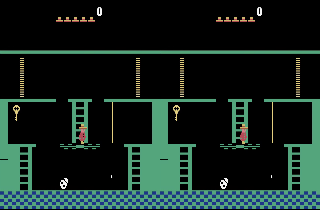

In [18]:
colorview(RGB,permutedims(hcat(check_dataset[1655][1][1],check_dataset[1655][1][2]), (3,1,2)))

In [19]:
check_dataset[1655][2]

"Go between the lasers"

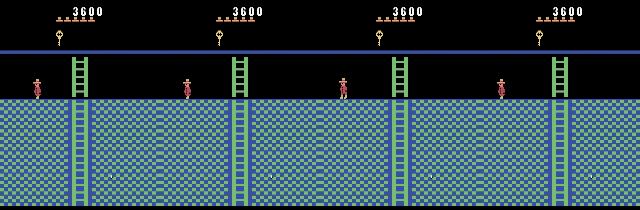

Go to the center of the room
2016


stdin>  exit


In [84]:
i = 1
while i <= length(dataset_false)
    IJulia.clear_output(true)
    display(colorview(RGB, permutedims(hcat(dataset_false[i][1][1],dataset_false[i][1][2],dataset_false[i][1][3],dataset_false[i][1][4]), (3,1,2))))
    println(dataset_false[i][2])
    println(i)
    response = readline()
    i += 1
    if (response=="exit")
        break
    elseif(response=="custom")
            response2 = readline()
            i = parse(Int,response2)
    end
    
end
    

In [92]:
dataset_t = Knet.load("4dataset_new.jld2","dataset")
dataset_f = Knet.load("4dataset_false.jld2","dataset")
dataset_total = append!(dataset_t,dataset_f)
Knet.save("4dataset_total.jld2","dataset",dataset_total)
summary(dataset_total)

"8300-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

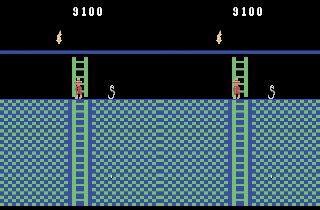

Go to the left side of the room
count: 70136


stdin>  exit


In [21]:
i = 70000
while i <= 72000
    IJulia.clear_output(true)
    display(colorview(RGB, permutedims(hcat(check_dataset[i][1][1],check_dataset[i][1][2]), (3,1,2))))
    println(check_dataset[i][2])
    println("count: ", i)
    if(i % 17 == 0) 
        println("===================================================END======================================")
    end
    response = readline()
    if(response=="y")
        push!(true_data, check_dataset[i])
        i+=18-(i%17)
    elseif(response=="q")
        i+=18-(i%17) 
        continue
    elseif(response=="s")
        push!(true_data, check_dataset[i])
        i+=17
        continue
    elseif(response=="exit")
        break
    else
        i += 1
    end
end


In [22]:
length(true_data)

103

In [23]:
Knet.save("trueDataset_68000_70000.jld2", "model", true_data)

In [41]:
x = Knet.load("trueDataset_1_2550.jld2", "model")
length(x)

86

In [1]:
# begin_index = 14950
# # for i = begin_index:length(check_dataset)
#   for i = begin_index:15000
#     IJulia.clear_output(true)
#     display(colorview(RGB, permutedims(hcat(check_dataset[i][1][1],check_dataset[i][1][2]), (3,1,2))))
#     println(check_dataset[i][2])
#     println("count: ", i)
#     if(i % 17 == 0) 
#         println("===================================================END======================================")
#     end
#     response = readline()
#     if(response=="y")
#         push!(true_data, check_dataset[i])
#         i+=17-(i%17)
#     elseif(response=="n")
#         continue
#     elseif(response=="exit")
#         break       
#     end
# end